# Atlas image postprocessing

- parse labels (distinct colors) into separate channels
- other processing: e.g. translation

In [1]:
import nilearn as ni
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import os
import numpy as np
import pandas as pd

from PIL import Image
from PIL import ImageOps
from PIL import ImagePalette

In [2]:
NLABELS = 18

image_base_dir = '/scratch/groups/jyeatman/samjohns-projects/data'
input_curv_dir = image_base_dir + '/ots-curv-mask-images-jitter'
input_parc_dir = image_base_dir + '/parc-images-jitter'
output_image_base_dir = image_base_dir + '/ots-images-jitter-processed'
output_curv_dir = output_image_base_dir + '/curv-mask'
output_parc_dir = output_image_base_dir + '/parc'

os.makedirs(output_image_base_dir, exist_ok=True)
os.makedirs(output_curv_dir, exist_ok=True)
os.makedirs(output_parc_dir, exist_ok=True)

img_fps = os.listdir(input_curv_dir)

In [3]:
len(os.listdir(input_curv_dir))

800

In [4]:
# same parameters for all images
def crop(image):
    """ Cropping helper function.
        Assumes input has correct y dimensions and
        x dim >= y dim; trims excess x dim to make a square.
    """
    x0, y0 = image.size   
    diff = (x0 - y0) / 2
    xl, xr = diff, x0 - diff
    ltrb = (xl, 0, xr, y0)
    return image.crop(ltrb)

def resize(image, newsize=256):
    return image.resize((newsize, newsize))

def process(image, newsize=256, grayscale=True):
    """Crops image, resizes, and converts to grayscale."""
    image = crop(image)
    image = resize(image, newsize)
    if grayscale:
        image = ImageOps.grayscale(image)
    return image

In [5]:
def get_closest_color(col, pal):
    return np.abs(col - pal).sum(axis=1).argmin()

In [6]:
def to_channel_img(img, pal):
    """ Converts an image into an image with one scalar value
        for each color in a specified palette. Each pixel's
        value is determined to be the index (in the palette)
        of the color that is closest to the pixel's original
        value.
        
        Note: expects image in RGBA PNG format, e.g. image
        shape should be (x_len, y_len, 4)).
    """
    img_np = np.array(img)
    img_colors = img_np[:, :, :-1] # remove alpha channel
    s = img_np.shape  
    ret_img = np.zeros(s[:-1])
    e = np.eye(pal.shape[0])

    # loop over pixels
    for x in range(s[0]):
        for y in range(s[1]):
            px_color = img_colors[x, y]
            cc = get_closest_color(px_color, pal)
            ret_img[x, y] = cc
    return ret_img
    

In [7]:
def split(array, threshold=70, bg=255):
    T = threshold
    t = array.copy()

    t[test_np < T] = 2.0
    t[test_np >= T] = 1.0
    t[test_np == bg]= 0.0
    
    return t

def process_img(img_fp, pal, img_out_fp=None, newsize=256):
    """ Downsamples an image, converts it to a numpy array,
        resamples each pixel color to nearest color
        in a specified palette (pal),
        and saves the result as a numpy array.
        Arguments:
            img_fp: full filepath to an RGBA image
            pal: palette to resample to (np array of shape (nclrs, 3))
            img_out_fp: if None, output is not saved
            newsize: size to resize to (image should be square)
        Returns:
            the resulting np array of shape (newsize, newsize,)
            with values in the range 0, pal.shape[0] - 1
    """
    img = Image.open(img_fp)
    img = img.resize((newsize, newsize))
    
    img_channel = to_channel_img(img, pal)
    
    # save (optionally)
    if img_out_fp is not None:
        np.save(img_out_fp, img_channel)
    
    return img_channel

In [8]:
def split(array, threshold=70, bg=255):
    T = threshold
    t = array.copy()

    t[test_np < T] = 2.0
    t[test_np >= T] = 1.0
    t[test_np == bg]= 0.0
    
    return t

def process_img_mask(img_fp, pal, img_out_fp=None, newsize=256):
    """ Downsamples an image, converts it to a numpy array,
        resamples each pixel color to nearest color
        in a specified palette (pal),
        and saves the result as a numpy array.
        Arguments:
            img_fp: full filepath to an RGBA image
            pal: palette to resample to (np array of shape (nclrs, 3))
            img_out_fp: if None, output is not saved
            newsize: size to resize to (image should be square)
        Returns:
            the resulting np array of shape (newsize, newsize,)
            with values in the range 0, pal.shape[0] - 1
    """
    img = Image.open(img_fp)
    img = img.resize((newsize, newsize))
    img_channel = spit(img)
    
    # save (optionally)
    if img_out_fp is not None:
        np.save(img_out_fp, img_channel)
    
    return img_channel

In [9]:
test_img = Image.open(f'{input_curv_dir}/{img_fps_curv[0]}')

In [10]:
test_img_proc = process(test_img)

In [11]:
test_np = np.array(test_img_proc)

In [12]:
test_np_c = (-1) * np.ones_like(test_np)

In [38]:
def split(array, threshold=70, bg=255):
    T = threshold
    t = array.copy()

    t[test_np < T] = 2.0
    t[test_np >= T] = 1.0
    t[test_np == bg]= 0.0
    
    return t

In [39]:
def process_curv(img_fp, newsize=256, img_out_fp=None):
    """Crops image, resizes, and converts to grayscale."""
    img = Image.open(img_fp)
    img = img.resize((newsize, newsize))
    img = ImageOps.grayscale(img)
    img_np = np.array(img)
    img_np = split(img_np)
    if img_out_fp is not None:
        np.save(img_out_fp, img_np)
    return img_np

In [40]:
out_parcs = os.listdir(output_parc_dir)

In [15]:
out_parc_shapes = []
for i, p in enumerate(out_parcs):
    onp = np.load(f'{output_parc_dir}/{p}')
    out_parc_shapes.append(onp.shape)
    del onp
    if i % 500 == 0:
        print(f'loaded {i} shapes')

loaded 0 shapes
loaded 500 shapes
loaded 1000 shapes
loaded 1500 shapes
loaded 2000 shapes


KeyboardInterrupt: 

In [27]:
ds = pd.DataFrame({'np_fn': out_parcs, 'sh': out_parc_shapes})

In [29]:
ds.head()

,np_fn,sh
0,sub-NDARMX277VHC-206.24-84.84-parc.npy,"(256, 256)"
1,sub-NDARCX021XWF-210.71-101.35-parc.npy,"(256, 256)"
2,sub-NDAREZ416XDW-208.13-88.33-parc.npy,"(256, 256)"
3,sub-NDARYU290HJ3-212.03-98.51-parc.npy,"(256, 256)"
4,sub-NDARYY218LU2-212.34-96.85-parc.npy,"(256, 256)"


In [28]:
ds[ds.sh==(21, 256, 256)]

,np_fn,sh


In [22]:
shapes = [p.shape for p in out_parc_nps]

In [15]:
len(os.listdir(output_curv_dir))

90441

In [45]:
curv_imgs = os.listdir(input_curv_dir)

In [50]:
for i, img in enumerate(curv_imgs):
    img_fp = f'{input_curv_dir}/{img}'
    out_fname = img[:-4]
    out_fp = f'{output_curv_dir}/{out_fname}'
    process_curv(img_fp, img_out_fp=out_fp)
    if i > 0 and i % 100 == 0:
        print(f'Processed {i} curvature images...')

Processed 100 curvature images...
Processed 200 curvature images...
Processed 300 curvature images...
Processed 400 curvature images...
Processed 500 curvature images...
Processed 600 curvature images...
Processed 700 curvature images...


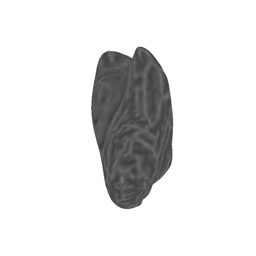

In [73]:
test_np = np.load(out_fp+'.npy')
img_test = Image.fromarray(test_np)
img_test.convert(mode='RGB')

In [20]:
input_curv_dir

'/scratch/groups/jyeatman/samjohns-projects/data/ots-curv-mask-images-jitter'

In [21]:
img_fps_curv[0]

'6029_T1.long.6029-216.69-84.75-curv-mask.png'

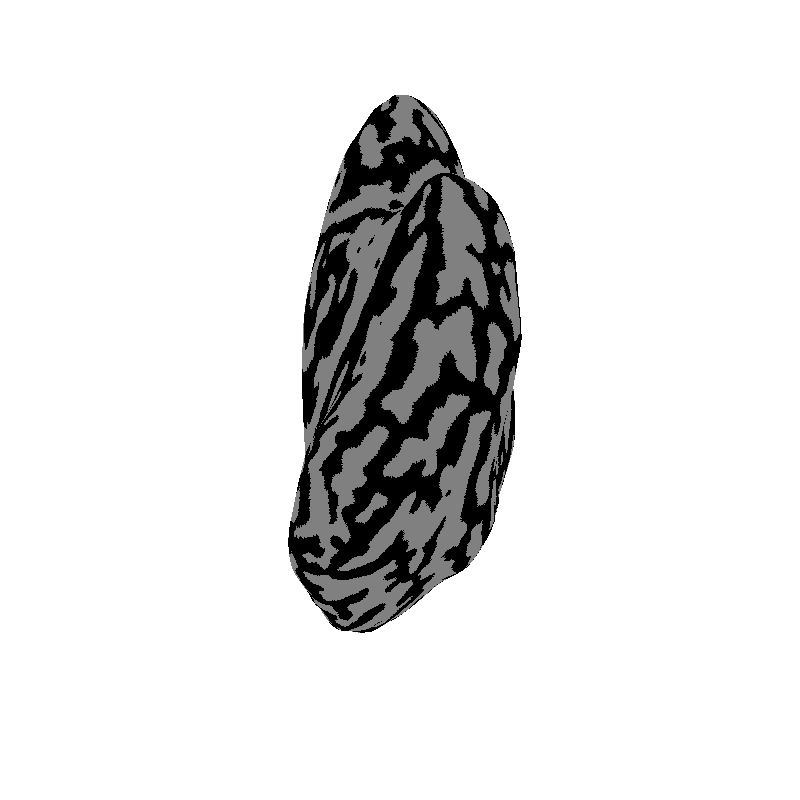

In [22]:
Image.open(f'{input_curv_dir}/{img_fps_curv[0]}')